In [2]:
from pylab import *
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:

Nx = 25         # No. of steps along the x direction
Ny = 25         # No. of steps along the y direction
radius = 0.35   # Radius of the wire loop
Niter = 1500    # No. of iterations to find potential
errors = np.zeros(Niter)   # Error array is declared

In [4]:
x = np.linspace(-0.5,0.5,25)    # x coordinate array
y = np.linspace(0.5,-0.5,25)    # y coordinate array
X,Y = meshgrid(x,y)             # The 2D grid of x and y coordinates
phi = np.zeros((Nx,Ny))         # Potential is initialised with zeros
ii = where(X*X + Y*Y <= radius*radius)  # Area covered by ring is found
phi[ii] = 1.0                   # Area covered by ring is initialised with 1 V

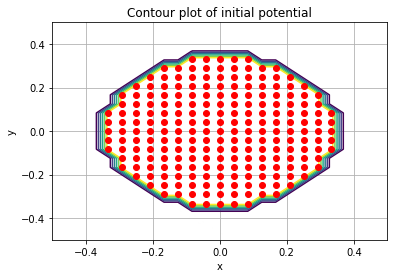

In [5]:
contour(X,Y,phi)
plot(x[ii[0]],y[ii[1]],'ro')
grid()
title('Contour plot of initial potential')
xlabel('x')
ylabel('y')
show()

In [6]:
newphi = np.zeros((Nx,Ny)) # This is to temporarily store the newly calculated values so as to calculate error
for k in range(Niter):
    oldphi = phi.copy()    # Phi before iteration is stored to calculate error
    newphi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2] + phi[1:-1,2:] + phi[0:-2,1:-1] + phi[2:,1:-1])  # Laplace equation applied
    
    newphi[1:-1,0] = newphi[1:-1,1]         # Boundary conditions applied
    newphi[1:-1,Nx-1] = newphi[1:-1,Nx-2]
    newphi[0,1:-1] = newphi[1,1:-1]
    newphi[ii] = 1.0
    
    errors[k] = max(np.absolute(np.subtract(oldphi.flatten(),newphi.flatten())))   # Error calculated as maximum difference
    phi = newphi.copy()

In [8]:
xError = np.linspace(1,Niter,1500)   # x Values for the equation
yError = np.log(errors)              # y values for equation
A=np.zeros((Niter,2))                # 2D matrix initialised
A[:,0] = 1
A[:,1] = xError
const = lstsq(A,yError)[0]           # parameters log(A) and B are found
yError = const[0] + const[1]*xError  # Above mentioned equation applied to find best fit line
yError = np.exp(yError)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [9]:
xError2 = np.linspace(501,Niter,1000)
yError2 = np.log(errors[500:])
B=np.zeros((Niter-500,2))
B[:,0] = 1
B[:,1] = xError2
const = lstsq(B,yError2)[0]
yError2 = const[0] + const[1]*xError2
yError2 = np.exp(yError2)

/home/suhas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


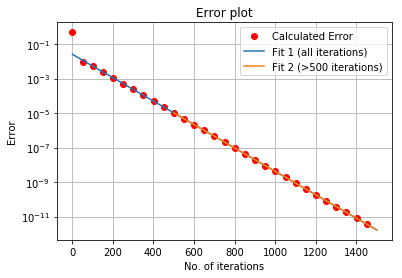

In [10]:
semilogy(np.arange(1,1501,50),errors[0::50],'ro')
plot(xError,yError)
plot(xError2, yError2)
grid()
title('Error plot')
xlabel('No. of iterations')
ylabel('Error')
legend(('Calculated Error','Fit 1 (all iterations)','Fit 2 (>500 iterations)'))
show()

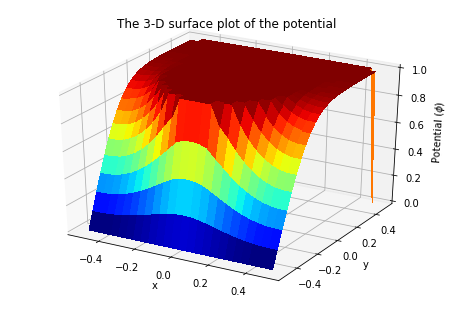

In [11]:
fig1 = figure(4)
ax = p3.Axes3D(fig1)
title('The 3-D surface plot of the potential')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential $(\phi)$')
surf = ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
show()

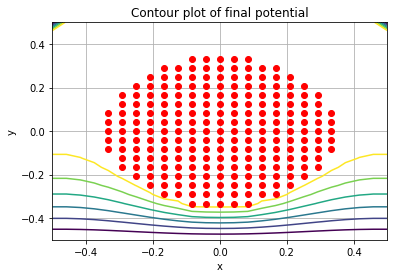

In [12]:
contour(x,y,phi)
plot(x[ii[0]],y[ii[1]],'ro')
xlabel('x')
ylabel('y')
title('Contour plot of final potential')
grid()
show()

In [13]:

Jx = np.zeros((Nx,Ny))
Jy = np.zeros((Nx,Ny))

Jy[1:-1,1:-1] = 0.5*(phi[1:-1,2:] - phi[1:-1,0:-2])
Jx[1:-1,1:-1] = 0.5*(phi[2:,1:-1] - phi[0:-2,1:-1])

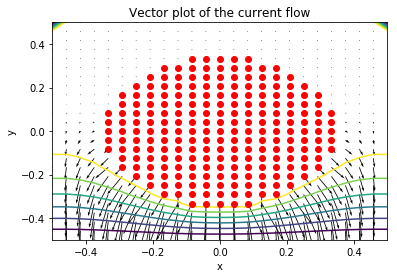

In [14]:
plot(x[ii[0]],y[ii[1]],'ro')
xlabel('x')
ylabel('y')
title('Vector plot of the current flow')
quiver(y,x,Jy[::-1,:],Jx[::-1,:])
contour(x,y,phi)
show()

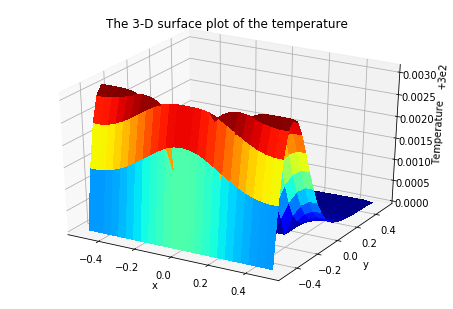

In [15]:

T = np.zeros((Nx,Ny))
T[:,:] = 300
sigma = 6*(10**7)
kappa = 385
for i in range(Niter):
    T[1:-1,1:-1] = 0.25*(T[1:-1,0:-2] + T[1:-1,2:] + T[0:-2,1:-1] + T[2:,1:-1] + (((Jx**2)[1:-1,1:-1] + (Jy**2)[1:-1,1:-1])*sigma*(16*(10**-8)))/kappa)
    T[1:-1,0]=T[1:-1,1]
    T[1:-1,Nx-1]=T[1:-1,Nx-2]
    T[0,1:-1]=T[1,1:-1]
    T[ii] = 300.0
fig1=figure(4)
ax=p3.Axes3D(fig1)
title('The 3-D surface plot of the temperature')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.jet,linewidth=0, antialiased=False)
show()